<a href="https://colab.research.google.com/github/TalkingSweetPotatoes/DemoDay/blob/master/%EB%A9%94%EB%89%B4%EA%B4%80%EB%A0%A8%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# colab 자체에 폰트 설치 (barplot제작 시 한글 폰트 깨짐 방지)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import requests
from bs4 import BeautifulSoup

#2019년의 url list를 만들자!

url = "https://mini.snu.kr/index.php/cafe/set/2019-"
url_list= []
day31 = [1, 3, 5, 7, 8, 10, 12]
day30 = [4, 6, 9, 11]
for i in range(1, 13):
    if i in day31:
        for to31 in range(1, 32):
            url_list.append(url + str(i) + '-' + str(to31) + '/abcf')
    elif i in day30:
        for to30 in range(1, 31):
            url_list.append(url + str(i) + '-' + str(to30) + '/abcf')
    elif i==2:
        for to28 in range(1, 29):
            url_list.append(url + str(i) + '-' + str(to28) + '/abcf')

In [ ]:
menu2019 = []
# 2019년의 메뉴 목록을 크롤링해오자! (단, 예외들을 제거)

for url in url_list:
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')

    menu = soup.find_all('td', {'class' : 'menu'})
    menu_list = []
    for a in menu:
        menu_list.append(a.get_text())
    for b in menu_list:
        if '휴무' in b or '휴업'in b or '휴점' in b or '공휴일' in b or '개교기념일' in b or '코로나'in b or '공간'in b or '●' in b or '누텔라와플' in b or '유니짜장' in b or '능이버섯' in b or '교직원식당' in b or '급식' in b:
            None
        else:
          menu2019.append(b)
menu2019

['25쇠고기미역국백반',
 '30사골떡만두국35고등어김치조림🐖',
 '30돈까스덮밥',
 '17참치김치찌개🐖',
 '25조갯살시금치된장국🐖',
 '30치킨마요덮밥17북어탕🐖40뚝배기불고기',
 '30떡만두국40우렁된장비빔밥🐖 35새우커리🐖30바지락칼국수🐖',
 '25잔치국수🐖40돌솥삼겹살콩나물찜',
 '30사천식제육볶음17토마토스크램블에그🐖',
 '30규동30해물순두부🐖',
 '25새우된장찌개🐖40더블함박스테이크30온메밀국수🐖',
 '17인삼닭죽',
 '25인삼닭죽',
 '40고추소스돈까스17꽁치무조림🐖30돌솥감자탕',
 '30해물된장찌개🐖40안동식찜닭                                                                                 30바지락리조또&베사멜소스🐖40치즈돈까스',
 '35마라우육덮밥30돌솥추어탕🐖',
 '30갈비탕17두부카레🐖',
 '40고추소스등심돈까스30낙지김치죽🐖',
 '25모듬어묵탕🐖30마늘볶음밥&찹소스40치킨퀘사디아',
 '17쇠고기메추리알장조림',
 '25홍합탕🐖',
 '30채사랑단호박영양밥🐖🥗17사골우거지국40안동찜닭',
 '30버섯들깨탕40고등어김치조림                                                                                 30부타동35에그함박스테이크',
 '35깐풍기30전주식콩나물국밥&계란동동',
 '35새우튀김덮밥🐖17쇠고기미역국',
 '35순살데리치킨25참치김치찌개🐖',
 '25쇠고기무국40갈비떡찜30칠리갈릭쉬림프파스타🐖',
 '25순두부찌개',
 '30오삼불고기',
 '30해물짬뽕밥🐖40닭양념구이',
 '30불고기필라프',
 '35파인애플탕수육',
 '25사골우거지국',
 '30라이스치킨텐더',
 '25감자수제비🐖30부타동',
 '30토마토소스카레🐖',
 '30낙지생채소비빔밥🐖',
 '17콩나물밥&부추양념🐖',
 '25단호박밥&부추양념장🐖',
 '30낙지볶음&소면🐖17버섯스크램블에그30돌솥부대

In [ ]:
# 정규표현식을 써서 깔끔하게 메뉴명만 가져오고, 빈도를 알아보는 counter함수 사용

import re

my_str = ' '.join(menu2019)

p = re.compile('[가-힣]+')  # \&?\s?[가-힣]+
m = p.findall(my_str)

from collections import Counter

result = Counter(m)
print(result)

Counter({'계란후라이': 148, '토스트': 106, '우유': 105, '사골우거지국': 65, '꽁치무조림': 59, '쇠고기미역국': 59, '참치김치찌개': 57, '콩나물밥': 56, '청국장찌개': 56, '규동': 55, '치즈돈까스': 53, '마라우육덮밥': 52, '갈비탕': 52, '제육숙주볶음': 48, '자반고등어구이': 46, '무쇠고기국': 46, '막국수': 46, '등심돈가스': 45, '부추양념장': 44, '떡갈비채소볶음': 44, '육개장': 43, '어묵탕': 42, '갈비구이': 41, '치킨마요덮밥': 40, '뚝배기불고기': 39, '더블함박스테이크': 39, '북어탕': 38, '제육보쌈': 38, '제육덮밥': 38, '마파두부': 37, '오삼불고기': 36, '특순대국밥': 36, '고등어김치조림': 35, '동파육': 35, '오리주물럭': 35, '쇠고기육개장': 35, '새우튀김덮밥': 34, '두부버섯찌개': 34, '잔치국수': 33, '나시고랭': 33, '알참치덮밥': 33, '육즙함박': 33, '쇠고기미역국백반': 32, '닭양념구이': 32, '불고기필라프': 32, '등심탕수육': 32, '두부명란찌개': 32, '설렁탕': 31, '감자탕': 30, '크림소스오므라이스': 30, '생선까스': 30, '해물짬뽕밥': 29, '순살양념치킨': 29, '쇠고기쌀국수': 29, '닭불고기간장볶음': 29, '부타동': 28, '쇠고기된장찌개': 28, '시나몬치킨스테이크': 27, '돈까스김치치즈나베': 27, '떡만두국': 26, '갈비떡찜': 26, '쇠고기채소죽': 26, '두부와쇠고기볶음': 26, '연어덮밥': 26, '김치치즈볶음밥': 26, '새우튀김돈까스벤또': 25, '차돌짬뽕': 25, '매운마라탕면': 25, '두부카레': 24, '닭볶음탕': 24, '낙지철판볶음밥': 24, '쇠고기카레라이스': 24, '참치채소죽': 24, '제육김치볶음': 24, '새우튀김우동

In [ ]:
# counter 딕셔너리에서 각각 메뉴, 빈도수인 key, value 변수에 저장

a1= result.keys()
a2 = result.values()

In [ ]:
# seaborn 라이브러리를 위해 판다스 데이터 프레임으로 값 저장

import pandas as pd
import numpy as np

df=pd.DataFrame([x for x in zip(a1, a2)])
df
df1 = df.sort_values(by= 1, ascending = False)  #내림차순으로 정리

df2 = df1.head(15)                              #상위 15개 항목만 가져오기
df2.columns =['menu', 'freq']
df2

,menu,freq
186,계란후라이,148
390,토스트,106
391,우유,105
44,사골우거지국,65
24,꽁치무조림,59
53,쇠고기미역국,59
4,참치김치찌개,57
68,콩나물밥,56
84,청국장찌개,56
17,규동,55


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

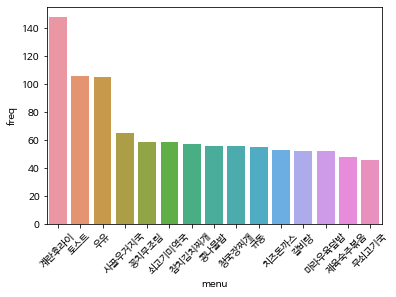

In [ ]:
# seaborn 라이브러리 barplot으로 표현!

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

sns.barplot(
    data= df2,
    x= "menu",
    y= "freq"
)
plt.xticks(rotation = 45 )

In [ ]:
price_compile = re.compile('[0-9]+')
price = price_compile.findall(my_str)

k=0
for c in range(0, len(price)):
  k+=int(price[c])

ave_2019 = k/len(price) #2019년 학식 가격 평균


pricecounter= Counter(price)
print(pricecounter)

Counter({'30': 2324, '40': 1061, '17': 699, '35': 523, '25': 490, '55': 194, '20': 102, '45': 92, '48': 92, '43': 49, '50': 23, '65': 7, '110': 6, '61': 5, '1': 2, '2': 2, '130': 2, '150': 2, '160': 2, '120': 1, '180': 1, '195': 1, '700': 1, '3': 1, '000': 1})


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


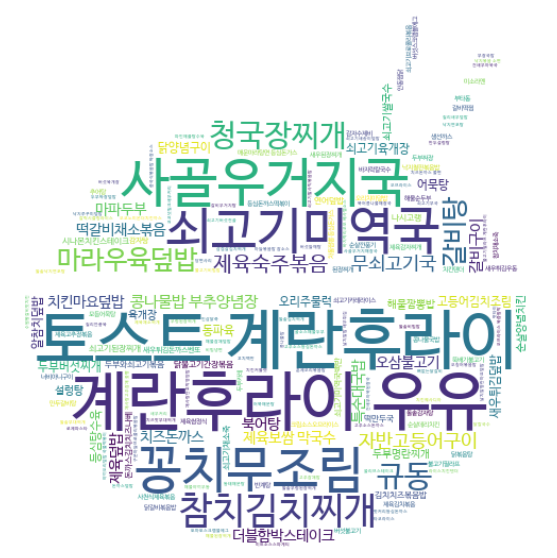

In [ ]:
# 2019년 메뉴를 워드클라우드로 봐보자!

text = ','.join(m)

!pip3 install -q wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한국어 형태소 분석을 위해 konlpy활용 
!pip3 install -q konlpy
!apt -qq -y install fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 귀여운 밥그릇 모양으로 워드클라우드 제작하기
from PIL import Image
wordcloud_mask = np.array(Image.open("/content/drive/MyDrive/bowl2.png"))

for i in range(len(wordcloud_mask)):
    for j in range(len(wordcloud_mask[i])):
        if wordcloud_mask[i][j]== 0:
            wordcloud_mask[i][j] = 255

from konlpy.tag import Okt
okt = Okt()

from collections import Counter
wc_text = okt.nouns(text)
wc_count = Counter(wc_text)

# 워드 클라우드 속성들 설정!
wordcloud = WordCloud(
    width = 800,
    height = 800,
    font_path = font_path,
    background_color="white",
    mask = wordcloud_mask
)
wc = wordcloud.generate_from_text(text)

array = wc.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#이모지를 활용해서 비건 메뉴와 no pork 메뉴도 크롤링하기 
my_str = ' '.join(menu2019)

pig = re.compile('[가-힣]+🐖')
inpig = pig.findall(my_str)


from collections import Counter

pigresult = Counter(inpig)
print(pigresult)

green = re.compile('[가-힣]+🥗')
ingreen = green.findall(my_str)

greenresult = Counter(ingreen)
print(greenresult)

Counter({'우유🐖': 100, '참치김치찌개🐖': 56, '꽁치무조림🐖': 46, '자반고등어구이🐖': 46, '부추양념장🐖': 43, '어묵탕🐖': 42, '북어탕🐖': 38, '마파두부🐖': 37, '고등어김치조림🐖': 34, '새우튀김덮밥🐖': 34, '알참치덮밥🐖': 33, '해물짬뽕밥🐖': 29, '연어덮밥🐖': 26, '두부카레🐖': 24, '낙지철판볶음밥🐖': 24, '참치채소죽🐖': 24, '새우튀김우동🐖': 23, '두부짜장🐖': 23, '해물순두부🐖': 22, '우렁된장찌개🐖': 22, '감자수제비🐖': 21, '추어탕🐖': 20, '새우된장찌개🐖': 19, '모듬어묵탕🐖': 18, '해물잡채덮밥🐖': 18, '바지락칼국수🐖': 17, '토마토스크램블에그🐖': 17, '북어콩나물해장국🐖': 16, '낙지쭈꾸미덮밥🐖': 16, '소면🐖': 15, '동태매운탕🐖': 15, '해물된장찌개🐖': 14, '돌솥우렁된장찌개🐖': 14, '오징어볶음밥🐖': 14, '돌솥낙지연포탕🐖': 13, '해물야끼우동🐖': 13, '어묵매운탕🐖': 13, '꼬치백반🐖': 12, '굴소스해물두부🐖': 12, '낙지연포탕🐖': 12, '코코넛밀크새우커리🐖': 12, '새우커리🐖': 11, '베사멜소스🐖': 11, '날치알명란마요덮밥🐖': 11, '돌솥비빔밥🐖': 11, '어묵김치전골🐖': 10, '칠리새우덮밥🐖': 10, '칠리갈릭쉬림프파스타🐖': 9, '미역수제비🐖': 9, '해물짬뽕수제비🐖': 9, '꽃빵🐖': 9, '꽃게된장찌개🐖': 9, '낙지주꾸미덮밥🐖': 9, '계란후라이🐖': 9, '생선까스🐖': 9, '돌솥추어탕🐖': 8, '채사랑단호박영양밥🐖': 8, '초당순두부🐖': 8, '돌솥강된장비빔밥🐖': 8, '연어갈릭로제파스타🐖': 8, '연두부비빔밥🐖': 8, '낙지생채소비빔밥🐖': 7, '유부소면🐖': 7, '돌솥동태매운탕🐖': 7, '건새우아욱국🐖': 7, '두부카레라이스🐖': 7, '계란장조림🐖': 7, '열무비빔밥🐖': 7, '우렁된장비빔밥🐖'